
# Convolutional Neural Networks for Image Classification

In [2]:
import pandas as pd
import numpy as np

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [19]:
single_image = x_train[6]

In [20]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [21]:
single_image.shape

(28, 28)

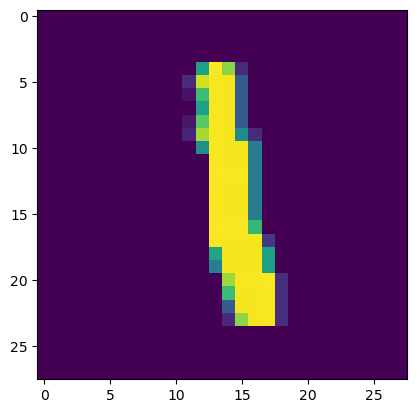

In [22]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [13]:
y_train.shape

(60000,)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [23]:
y_example[6]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [24]:
single_image.max()

255

In [25]:
single_image.min()

0

In [26]:
x_train = x_train/255
x_test = x_test/255

In [27]:
scaled_single = x_train[0]

In [28]:
scaled_single.max()

1.0

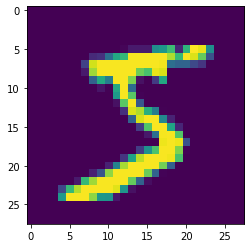

In [26]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [31]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
x_test = x_test.reshape(10000,28,28,1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

C:\Users\mindf\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [41]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9137 - loss: 0.2840 - val_accuracy: 0.9821 - val_loss: 0.0553
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9854 - loss: 0.0481 - val_accuracy: 0.9859 - val_loss: 0.0468
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9913 - loss: 0.0294 - val_accuracy: 0.9887 - val_loss: 0.0360
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9875 - val_loss: 0.0412
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9850 - val_loss: 0.0520


## Evaluate the Model

In [42]:
model.metrics_names

['loss', 'compile_metrics']

In [43]:
losses = pd.DataFrame(model.history.history)

In [44]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.957983,0.138521,0.9821,0.055346
1,0.985917,0.046465,0.9859,0.046774
2,0.991017,0.029897,0.9887,0.035962
3,0.993867,0.020109,0.9875,0.041227
4,0.995067,0.014214,0.9850,0.051991


<Axes: >

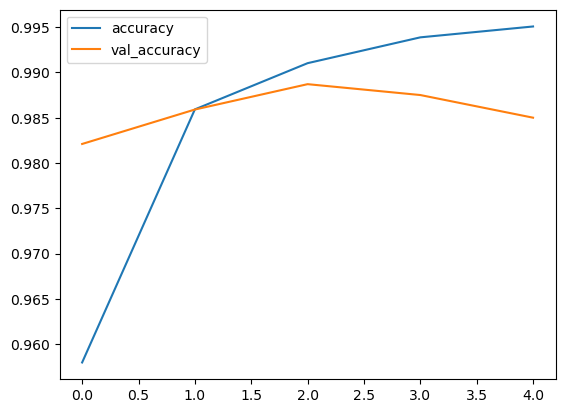

In [45]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

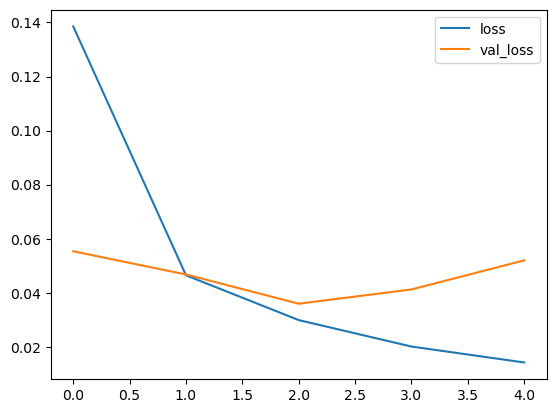

In [46]:
losses[['loss','val_loss']].plot()

In [47]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[0.051990900188684464, 0.9850000143051147]


In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [51]:
y_cat_test.shape

(10000, 10)

In [52]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [61]:
predictions[0].round()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [62]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [77]:
predictions = [p.round() for p in predictions]
#print(classification_report(y_test,predictions))
y_test[3], predictions[3]

(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [60]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    1,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    0,    1,    0,    0],
       [   1,    4, 1007,    1,    4,    0,    0,   13,    2,    0],
       [   0,    0,    5, 1000,    0,    2,    0,    2,    1,    0],
       [   0,    0,    0,    0,  979,    0,    0,    0,    0,    3],
       [   0,    0,    0,    6,    0,  883,    1,    0,    2,    0],
       [   4,    3,    0,    1,    5,    1,  943,    0,    1,    0],
       [   0,    1,    2,    0,    0,    0,    0, 1024,    1,    0],
       [   2,    1,    4,    4,    4,    0,    0,    5,  952,    2],
       [   0,    3,    0,    1,   16,    4,    0,   14,    1,  970]],
      dtype=int64)

In [59]:
import seaborn as sns

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

<Figure size 1000x600 with 0 Axes>

# Predicting a given image

In [84]:
my_number = x_test[89]

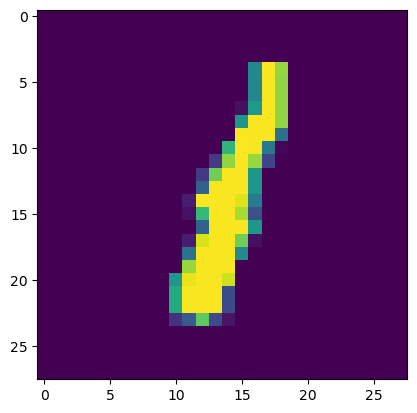

In [85]:
plt.imshow(my_number.reshape(28,28))

In [86]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_number.reshape(1,28,28,1)).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Looks like the CNN performed quite well!